In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("data/Cleaned_Laptop_data.csv")
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15


In [47]:
df.describe()

,ssd,hdd,os_bit,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,431.750000,190.857143,59.178571,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,316.436824,401.181158,11.453644,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,32.000000,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,256.000000,0.000000,64.000000,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,512.000000,0.000000,64.000000,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,512.000000,0.000000,64.000000,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,3072.000000,2048.000000,64.000000,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   895 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           871 non-null    object 
 6   ram_type         871 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

# Exploratory Data Analysis

## Control for Outliers and Missing Values

In [49]:
df.isna().sum()

brand               0
model               0
processor_brand     0
processor_name      1
processor_gnrtn     0
ram_gb             25
ram_type           25
ssd                 0
hdd                 0
os                  0
os_bit              0
graphic_card_gb     0
weight              0
display_size        0
warranty            0
Touchscreen         0
msoffice            0
latest_price        0
old_price           0
discount            0
star_rating         0
ratings             0
reviews             0
dtype: int64

In [50]:
df.shape

(896, 23)

In [51]:
df_fill = df.fillna(method="bfill")

C:\Users\caner\AppData\Local\Temp\ipykernel_16972\3502944438.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill = df.fillna(method="bfill")


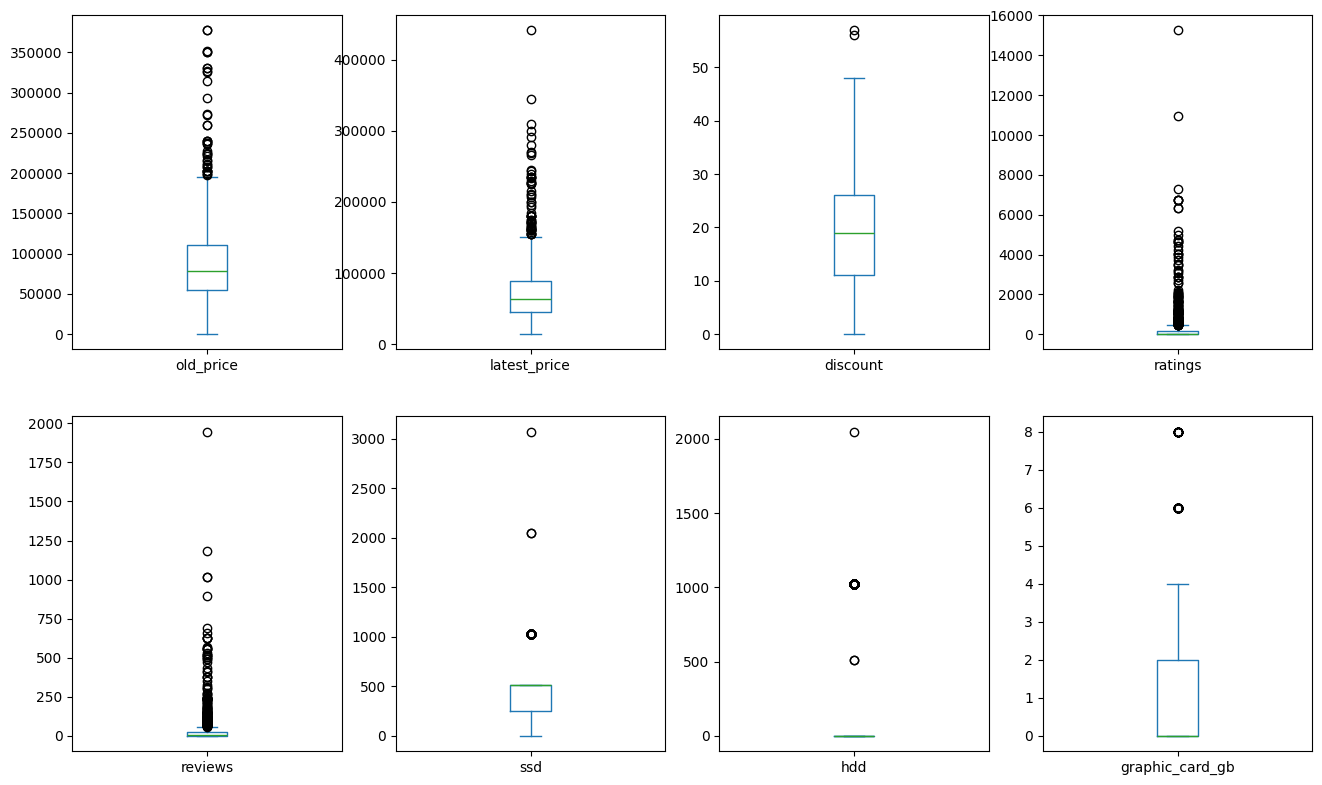

In [52]:
df_to_plot = df[["old_price", "latest_price", "discount", "ratings", "reviews", "ssd", "hdd", "graphic_card_gb"]]
df_to_plot.plot(subplots=True, kind="box", layout=(4, 4), figsize=(16, 20))
plt.subplots_adjust()

In [53]:
def z_score(x, mean, std):
    return (x - mean) / std

In [54]:
df["z_score"] = df.old_price.apply(lambda x: z_score(x, df.old_price.mean(), df.old_price.std()))

In [55]:
df_no_outlier = df[df.z_score < 1]

<Axes: ylabel='old_price'>

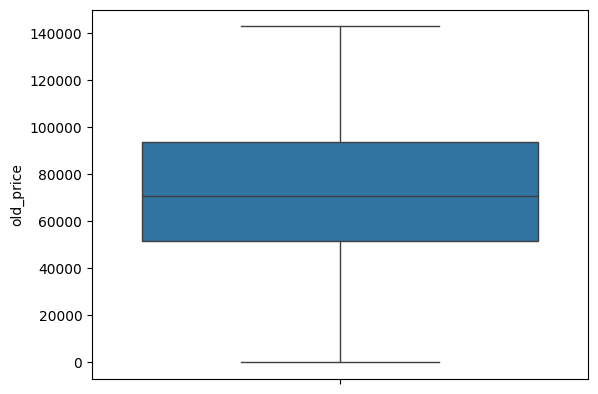

In [56]:
sns.boxplot(df_no_outlier.old_price)

In [57]:
df_no_outlier.shape

(784, 24)

# Statistical Analysis

<Axes: >

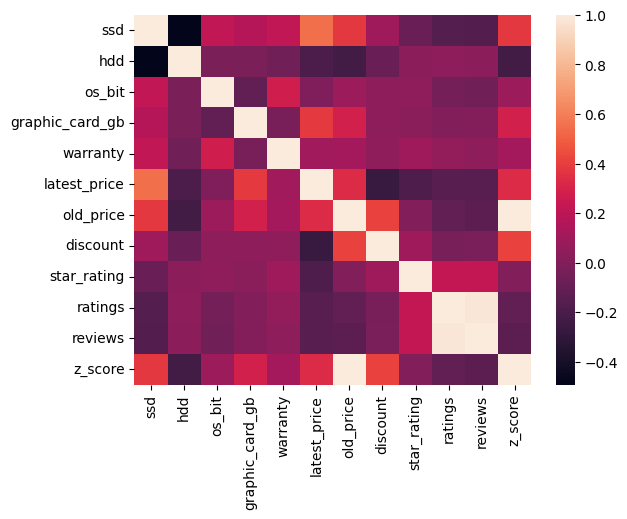

In [58]:
sns.heatmap(df_no_outlier.corr(numeric_only=True))

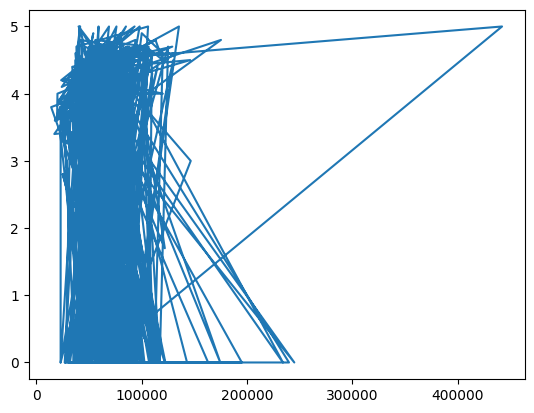

In [89]:
plt.plot(df_no_outlier.latest_price, df_no_outlier.star_rating)

**It seems like there is no relationship being high price and star rating**

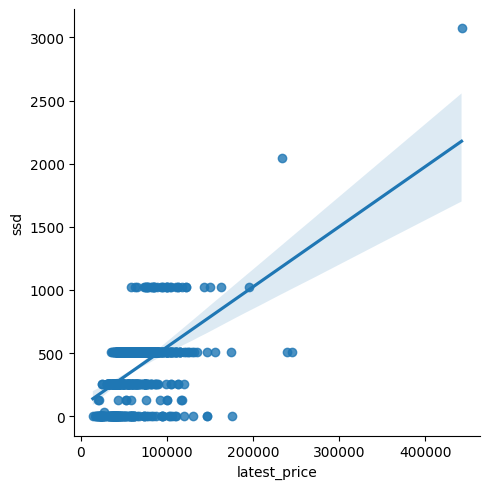

In [59]:
sns.lmplot(data=df_no_outlier, x="latest_price", y="ssd")

**It seems like a weak positive correlation between latest price and ssd**

# Data Visualization

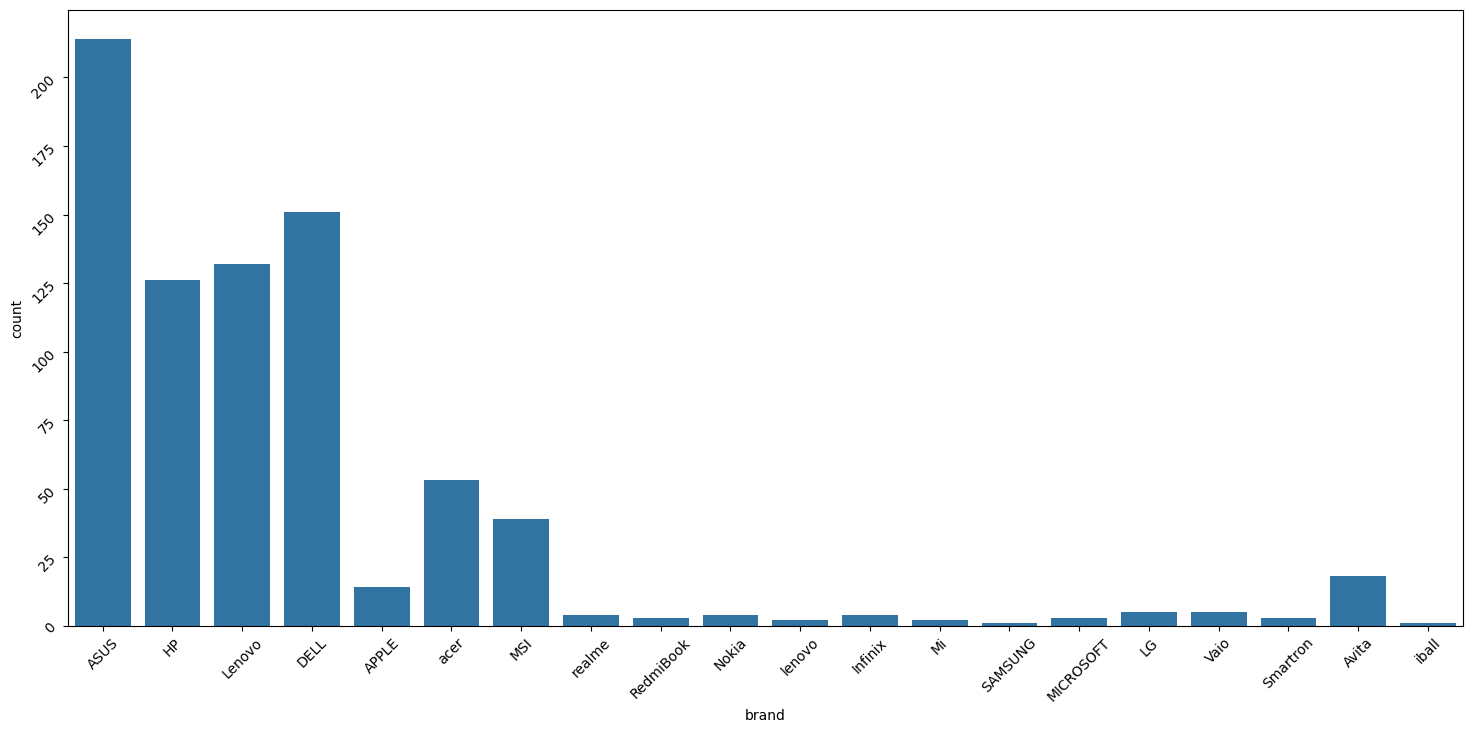

In [64]:
plt.figure(figsize=(18, 8))
sns.countplot(data=df_no_outlier, x = "brand")
plt.tick_params(labelrotation=45)

**ASUS is leading brand in selling**

In [80]:
df_no_outlier["processor"] = df_no_outlier.processor_brand + " " + df_no_outlier.processor_name
df_no_outlier.head()

C:\Users\caner\AppData\Local\Temp\ipykernel_16972\1876227495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier["processor"] = df_no_outlier.processor_brand + " " + df_no_outlier.processor_name


,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews,z_score,processor
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,No,No,23990,26990,11,3.8,15279,1947,-1.097354,Intel Celeron Dual
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,No,No,37990,50990,25,4.3,990,108,-0.666626,Intel Core i3
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,No,No,32890,46990,30,3.9,28,4,-0.738414,Intel Core i3
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,No,Yes,42990,57330,25,4.4,158,18,-0.552842,Intel Core i3
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,No,No,54990,70171,21,4.2,116,15,-0.322385,Intel Core i5


<Axes: xlabel='processor', ylabel='count'>

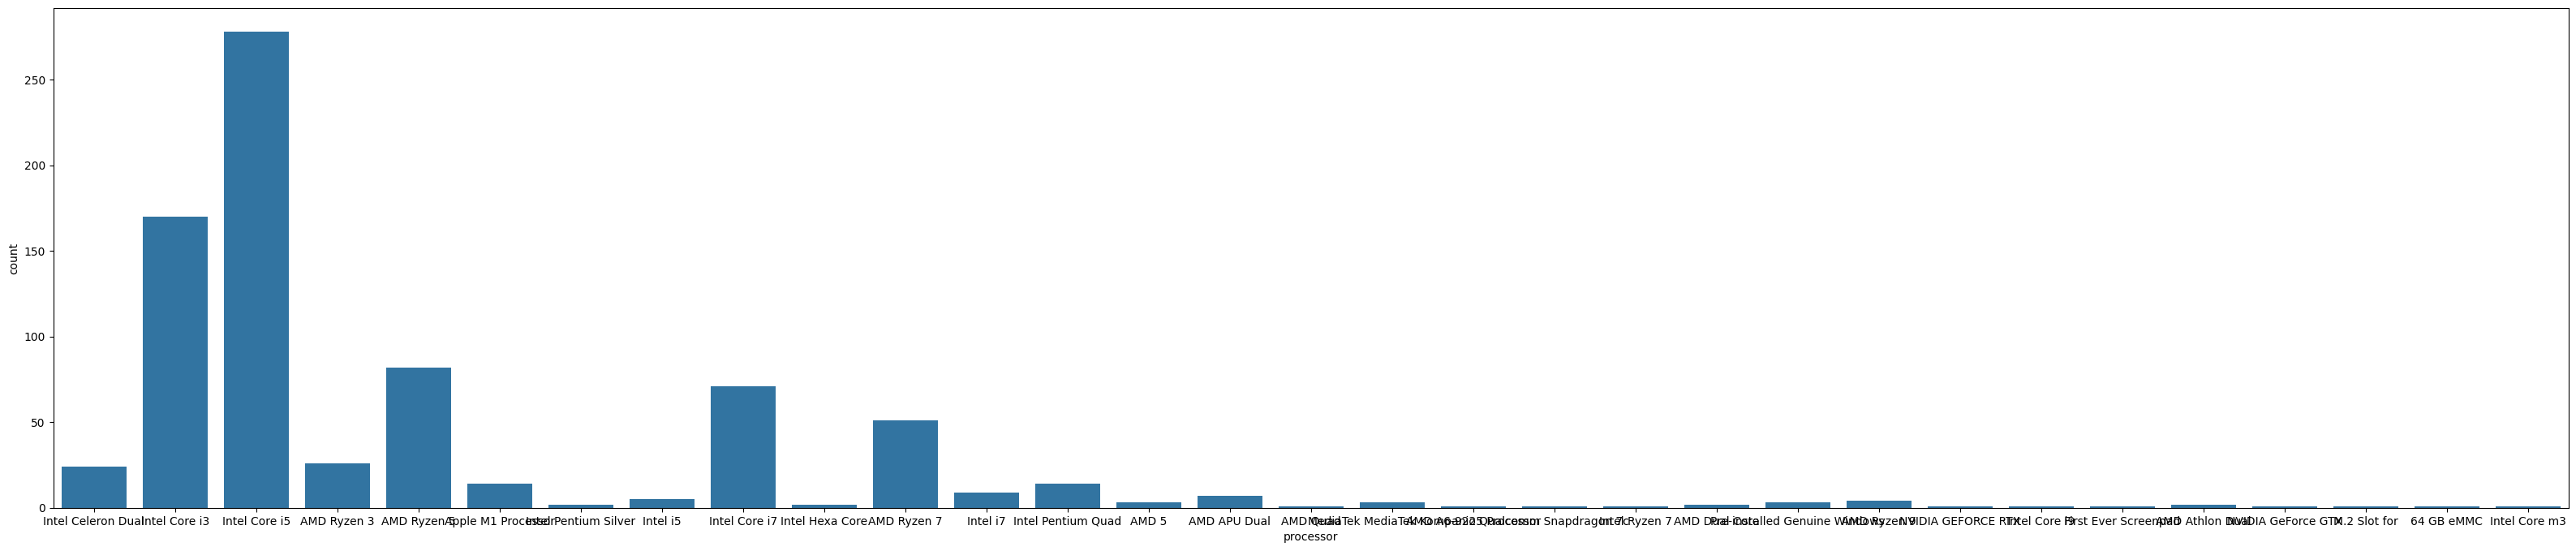

In [83]:
plt.figure(figsize=(40, 8))
sns.countplot(data=df_no_outlier, x = "processor")

**Intel Core i5 is leading in selling processor**

In [92]:
df_no_outlier.loc[df_no_outlier.processor == "Intel Core i5"]["latest_price"].mean()

69083.54316546762

In [93]:
df_no_outlier.loc[df_no_outlier.processor == "Intel Core i3"]["latest_price"].mean()

42583.964705882354

**Intel Core i5 ise best selling for 60000 range and for i3 is 40000 range.**